# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Data_cars.csv')
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [3]:
df.shape

(166695, 9)

In [4]:
print(df.columns)
df.head()

Index(['Price', 'Make', 'Model', 'Model_year', 'Mileage', 'Fuel', 'Gearbox',
       'Online', 'Description'],
      dtype='object')


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [5]:
# Missing values
df.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
dtype: int64

## Cardinalité

In [6]:
np.sort(df['Make'].unique())

array(['ABARTH', 'AC', 'AIXAM', 'ALFA ROMEO', 'ALPINA', 'ALPINE',
       'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN HEALEY', 'AUTOBIANCHI',
       'BELLIER', 'BENTLEY', 'BMW', 'BMW-ALPINA', 'BOLLORE', 'BUGATTI',
       'BURBY S', 'CADILLAC', 'CATERHAM', 'CHATENET', 'CHEVROLET',
       'CHRYSLER', 'CITROEN', 'DACIA', 'DAEWOO', 'DAIHATSU', 'DANGEL',
       'DODGE', 'DONKERVOORT', 'DS', 'FERRARI', 'FIAT', 'FISKER', 'FORD',
       'GRECAV', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'INNOCENTI',
       'INTERMECCANICA', 'JAGUAR', 'JEEP', 'JIAYUAN', 'KIA', 'LADA',
       'LAMBORGHINI', 'LANCIA', 'LAND ROVER', 'LEXUS', 'LIGIER', 'LOTUS',
       'MASERATI', 'MATRA', 'MAZDA', 'MCLAREN', 'MERCEDES',
       'MERCEDES-AMG', 'MG', 'MIA ELECTRIC', 'MICROCAR', 'MINI',
       'MITSUBISHI', 'MORGAN', 'MPM MOTORS', 'NISSAN', 'OLDSMOBILE',
       'OPEL', 'PACKARD', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'RILEY',
       'ROLLS ROYCE', 'ROVER', 'SAAB', 'SEAT', 'SECMA', 'SHELBY', 'SIMCA',
       'SKODA', 'SMART', 

In [7]:
df['Make'].value_counts()[-60:]

INFINITI          269
MASERATI          181
ABARTH            177
FERRARI           167
SUBARU            117
LANCIA            111
CHRYSLER           80
ASTON MARTIN       73
BENTLEY            61
SSANGYONG          59
DODGE              47
LAMBORGHINI        40
MERCEDES-AMG       30
LOTUS              27
CADILLAC           27
ROLLS ROYCE        21
TESLA              20
SAAB               20
MG                 20
MORGAN             18
ROVER              17
TRIUMPH            17
AIXAM              14
MICROCAR           11
MCLAREN            10
LIGIER             10
HUMMER              8
DAIHATSU            8
AUSTIN              7
AUSTIN HEALEY       6
ALPINA              5
CHATENET            4
PACKARD             3
DAEWOO              3
LADA                3
DONKERVOORT         2
OLDSMOBILE          2
MIA ELECTRIC        2
BOLLORE             2
ALPINE              2
MATRA               1
GRECAV              1
DANGEL              1
AC                  1
SECMA               1
BMW-ALPINA

In [8]:
df['Model'].value_counts()[-500:]

XV            28
CITIGO        28
RC            27
QUBO          27
CALIFORNIA    27
              ..
924            1
BX             1
SHUMA          1
450            1
XD3            1
Name: Model, Length: 500, dtype: int64

On remarque qu'il existe beaucoup de marques et de model qui apparaissent peu dans le dataset

In [9]:
df["Fuel"].value_counts()

Diesel                              109446
Essence                              53392
Hybride essence électrique            2725
Electrique                             704
Hybride diesel électrique              310
Bicarburation essence GPL               96
Bicarburation essence bioéthanol        21
Bicarburation essence GNV                1
Name: Fuel, dtype: int64

In [10]:
df["Gearbox"].value_counts()

mécanique      113014
automatique     53681
Name: Gearbox, dtype: int64

## Distribution

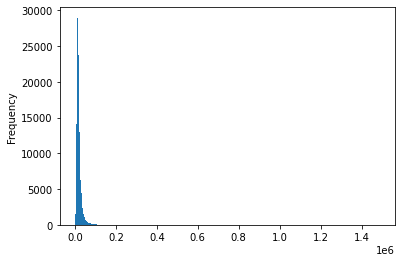

In [11]:
# Price
df['Price'].plot.hist(bins=500)

On remarque que la variable cible n'a pas une distribution normale. 
Il faudra le prendre en compte pour le modèle

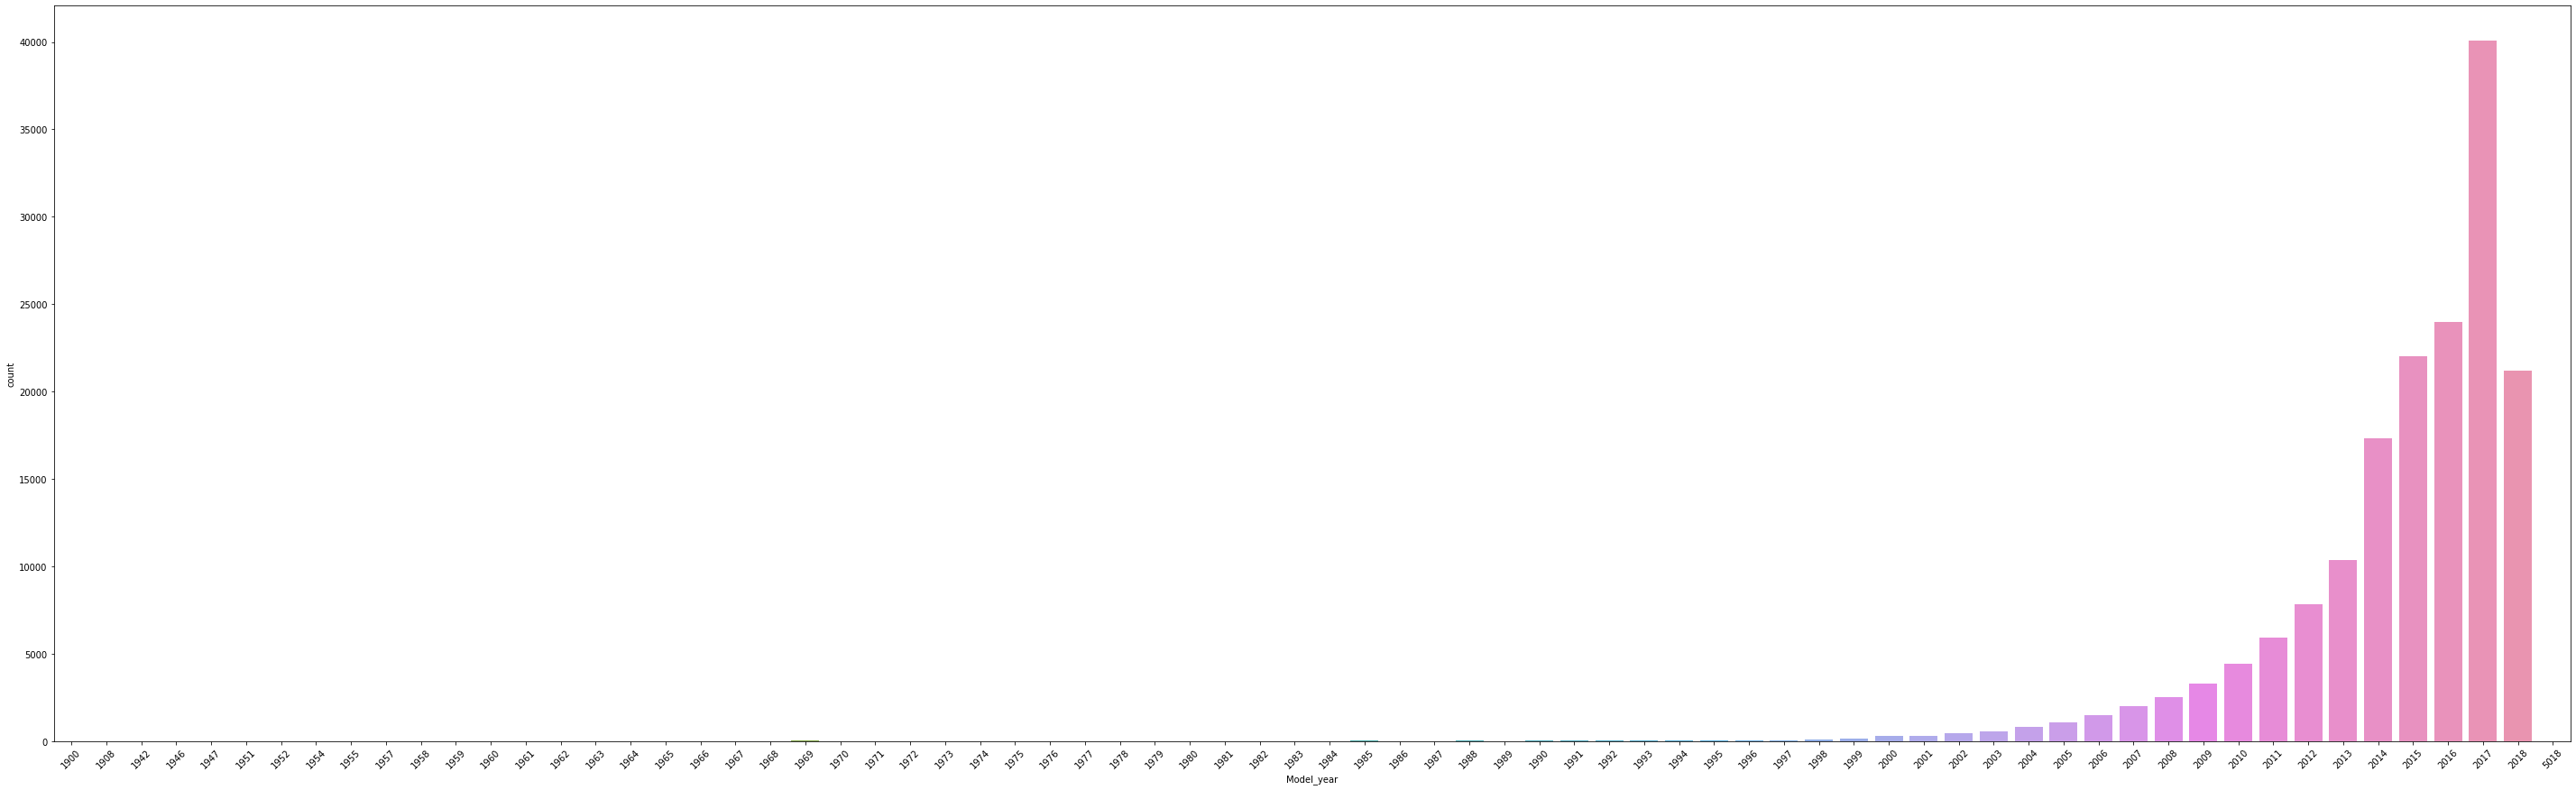

In [12]:
# Model year
plt.figure(figsize=(50, 15))
plt.xticks(rotation=45)
ax = sns.countplot(data=df, x = 'Model_year')

On remarque qu'il existe des outliers dans l'année de sortie du modèle. C'est sans doute des voitures de collections